# Step 2: ANALYZE

In [82]:
import pandas as pd
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
import re
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
import json


In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as SW_en
from spacy.lang.es.stop_words import STOP_WORDS as SW_es

In [3]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [4]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [5]:
#import nltk 
#from nltk.corpus import stopwords 
#set(stopwords.words('english'))


In [6]:
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
#!python -m spacy download es_core_news_md

In [7]:
##################################333 PARAMETERS #####################

dic_key_words = \
{   'data analyst'  : ['data analyst','analisis de datos', 
                       'data analytics', 'analitica de datos',
                       'business analyst', 'analisis de negocios',
                       'sql',
                       'python',
                       'business intelligence', 'inteligencia de negocios' , ' bi ' , 
                       'excel', 'microsoft office', 'ms office' ,
                       'dashboard','kpi', 
                       'reporting', 'informes',
                       'tableau', 'powerbi', 'power bi', 'microsoft bi', 'qlik', 'spotfire',
                      ],
 
    'data scientist': ['data scientist', 'cientifico de datos',
                       'data science', 'ciencia de datos',
                       'sql', 
                       'python', ' r ', 
                       ' ml ', 'machine learning','deep learning','neuronal networks', 
                       'pandas', 'numpy', 'scipy', 'web scrapping' , 
                       'data visualization', 'visualizacion de datos','matplotlib', 'seaborn', 
                       'spss',  'statistics',
                       'sklearn','sk learn', 'sk-learn','scikit learn', 'scikit-learn' ,'tensorflow', 'keras',
                       'data wrangling', 'limpieza de datos',
                       ' nlp ', 'a/b testing','a b testing'
                      ],
 
    'data engineer':  ['data engineer', 'ingeniero de datos',
                       'sql', 'nosql', 'no sql', 'bases de datos no relacionales',
                       'python', ' r ', 'scala', 'java ', 'spark', 'hadoop', 'haddop' 'hive', 'impala', 'kafka', 
                       'data wrangling', 'limpieza de datos',
                       'etl','extract, transform and load','map reduce','mapreduce', 
                       'data acquisition', 'adquisicion de datos',
                       'big data', 'bigdata', 'bigquery',
                       'data warehouse', 
                       ' aws ', 'azure',
                       'software engineering'
                      ]
}

## Getting csv

#### > PROFILE:

In [8]:
platform.system()

'Linux'

In [9]:
if platform.system() == 'Linux':
    df_profile = pd.read_csv(f'../data/raw/df_profile_cristopherrojaslepe.csv',
                             sep = ';',
                             encoding= 'utf8'
                              )
    
elif platform.system() == 'Windows':
    df_profile = pd.read_csv(f'..\\data\\raw\\df_profile.csv',
                             sep = ';',
                             encoding= 'utf8'
                            )
    
df_profile

,Unnamed: 0,info
0,profile,cristopherrojaslepe
1,headline,data scientist & analyst | python | pandas | n...
2,open new jobs,True
3,about,data scientist & analyst and industrial engine...
4,experiences,"['collection coordination analyst', 'real esta..."
5,years of experiences,"['1 yr 2 mos', '1 yr', '2 yrs 1 mo', '8 mos', ..."
6,total years,7
7,degrees,"['master', 'engineering - be']"
8,fields,"['data analytics', 'industrial engineering']"
9,skills,"['microsoft project', 'español', 'microsoft of..."


In [10]:
## ONLY FOR JUPYTER !!!!!!!!!!
df_profile.rename(columns={'Unnamed: 0':'type'},inplace=True)
df_profile.set_index('type', inplace=True)

In [11]:
df_profile

,info
type,
profile,cristopherrojaslepe
headline,data scientist & analyst | python | pandas | n...
open new jobs,True
about,data scientist & analyst and industrial engine...
experiences,"['collection coordination analyst', 'real esta..."
years of experiences,"['1 yr 2 mos', '1 yr', '2 yrs 1 mo', '8 mos', ..."
total years,7
degrees,"['master', 'engineering - be']"
fields,"['data analytics', 'industrial engineering']"


#### > JOBS:

In [12]:

#f'../data/raw/df_jobs_Madrid_2020-04-18 23.50.csv',
#f'..\\data\\raw\\df_jobs_Madrid_2020-04-18 23.50.csv'
if platform.system() == 'Linux':
    df_jobs_raw = pd.read_csv(f'../data/raw/df_jobs/df_jobs_Barcelona_2020-04-21 00.58.csv',
                              sep = ';',
                              encoding= 'utf8',
                  )
elif platform.system() == 'Windows':
    df_jobs_raw = pd.read_csv(f'..\\data\\raw\\df_jobs\\df_jobs_Barcelona_2020-04-21 00.58.csv',
                              sep = ';',
                              encoding= 'utf8',
                  )

In [13]:
df_jobs = df_jobs_raw

In [14]:
df_jobs.shape

(180, 18)

In [15]:
df_jobs.head(3)

,JOB TITLE,LOCATION,SEARCH DATETIME,Current Job Id,Job html,Job name,Company name,Company location,Posted date,Estimated post date,Easy apply,Job Description,Skills match,Seniority Level,Industry,Employment Type,Job Functions,Job info
0,data analyst,Barcelona,2020-04-21 00:58,1753506830,https://www.linkedin.com/jobs/view/1753506830/,Solution Architect-Applied Intelligence Barcelona,Accenture España,"Barcelona, ES",3 weeks,2020-03-31 00:58,False,Accenture Digital offers a comprehensive portf...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",Associate,Information Technology & Services Computer Sof...,Full-time,Engineering Information Technology,Posted Date\nPosted 3 weeks ago\nNumber of vie...
1,data analyst,Barcelona,2020-04-21 00:58,1816757840,https://www.linkedin.com/jobs/view/1816757840/,Senior Investment Accounting Analyst.,Zurich Insurance Company Ltd,"Barcelona, ES",1 week,2020-04-14 00:58,False,Our opportunity\n\nInvestment Administration &...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",NaN,Financial Services Insurance,Full-time,Accounting/Auditing Finance,Posted Date\nPosted 1 week ago\nNumber of view...
2,data analyst,Barcelona,2020-04-21 00:58,1769986744,https://www.linkedin.com/jobs/view/1769986744/,Accounts Payable Analyst - Dutch Speaker,Tech Data,"Barcelona, ES",2 weeks,2020-04-07 00:58,False,It's rewarding to work at a company where YOU ...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",NaN,Computer Hardware Computer Software Informatio...,Full-time,Accounting/Auditing Finance,Posted Date\nPosted 2 weeks ago\nNumber of vie...


In [16]:
# ONLY IN CASE TO CORRECT WRONG DF
#df_jobs.drop(columns='Job htmlJob name', inplace=True)

#df_jobs = df_jobs[['JOB TITLE', 'LOCATION', 'SEARCH DATETIME', 'Current Job Id',
#       'Job html', 'Job name', 'Company name', 'Company location',
#       'Posted date', 'Estimated post date', 'Easy apply', 'Skills match',
#       'Seniority Level', 'Industry', 'Employment Type', 'Job Functions',
#       'Job info']]

In [17]:
df_jobs[df_jobs['JOB TITLE']=='data analyst'].shape

(62, 18)

In [18]:
df_jobs[df_jobs['JOB TITLE']=='data scientist'].shape

(90, 18)

In [19]:
df_jobs[df_jobs['JOB TITLE']=='data engineer'].shape

(28, 18)

## Analizyng info

In [20]:
location = df_jobs.loc[0,'LOCATION']
location

'Barcelona'

### > Cleaning jobs:

In [21]:
df_jobs.loc[0,'JOB TITLE':'Current Job Id']

JOB TITLE              data analyst
LOCATION                  Barcelona
SEARCH DATETIME    2020-04-21 00:58
Current Job Id           1753506830
Name: 0, dtype: object

##### * JOB TITLE_ID

In [22]:
df_jobs['JOB TITLE_ID'] = df_jobs.apply(lambda x: x['JOB TITLE'] +"_"+ str(x['Current Job Id']), axis = 1 )

In [23]:
df_jobs.shape[0] 

180

In [24]:
len(df_jobs['JOB TITLE_ID'].unique())

180

In [25]:
pd.pivot_table(df_jobs,
               values="LOCATION",
               index=['JOB TITLE_ID'],
               aggfunc=np.count_nonzero        
              ).sort_values(by=['LOCATION'], ascending=False)

,LOCATION
JOB TITLE_ID,
data analyst_1422096341,1
data scientist_1758546757,1
data scientist_1768580522,1
data scientist_1772485017,1
data scientist_1776631970,1
...,...
data analyst_1830200694,1
data engineer_1117356782,1
data engineer_1401777412,1


In [26]:
df_jobs[df_jobs['Current Job Id']==1774326710]

,JOB TITLE,LOCATION,SEARCH DATETIME,Current Job Id,Job html,Job name,Company name,Company location,Posted date,Estimated post date,Easy apply,Job Description,Skills match,Seniority Level,Industry,Employment Type,Job Functions,Job info,JOB TITLE_ID


In [27]:
df_jobs.shape[0] - len(df_jobs['JOB TITLE_ID'].unique())

0

In [28]:
df_jobs.drop_duplicates(subset='JOB TITLE_ID', keep='first', inplace = True)

In [29]:
df_jobs.shape

(180, 19)

##### * Current Job Id

In [30]:
len(df_jobs['Current Job Id'].unique())

149

In [31]:
pd.pivot_table(df_jobs,
               values="LOCATION",
               index=['Current Job Id'],
               aggfunc=np.count_nonzero        
              ).sort_values(by=['LOCATION'], ascending=False)

,LOCATION
Current Job Id,
1801225565,2
1707338924,2
1827309890,2
1756896646,2
1758546757,2
...,...
1776631970,1
1773974460,1
1772489160,1


In [32]:
df_jobs[df_jobs['Current Job Id']==1645918674]

,JOB TITLE,LOCATION,SEARCH DATETIME,Current Job Id,Job html,Job name,Company name,Company location,Posted date,Estimated post date,Easy apply,Job Description,Skills match,Seniority Level,Industry,Employment Type,Job Functions,Job info,JOB TITLE_ID


In [33]:
df_jobs.drop_duplicates(subset='Current Job Id', keep='first')

,JOB TITLE,LOCATION,SEARCH DATETIME,Current Job Id,Job html,Job name,Company name,Company location,Posted date,Estimated post date,Easy apply,Job Description,Skills match,Seniority Level,Industry,Employment Type,Job Functions,Job info,JOB TITLE_ID
0,data analyst,Barcelona,2020-04-21 00:58,1753506830,https://www.linkedin.com/jobs/view/1753506830/,Solution Architect-Applied Intelligence Barcelona,Accenture España,"Barcelona, ES",3 weeks,2020-03-31 00:58,False,Accenture Digital offers a comprehensive portf...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",Associate,Information Technology & Services Computer Sof...,Full-time,Engineering Information Technology,Posted Date\nPosted 3 weeks ago\nNumber of vie...,data analyst_1753506830
1,data analyst,Barcelona,2020-04-21 00:58,1816757840,https://www.linkedin.com/jobs/view/1816757840/,Senior Investment Accounting Analyst.,Zurich Insurance Company Ltd,"Barcelona, ES",1 week,2020-04-14 00:58,False,Our opportunity\n\nInvestment Administration &...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",NaN,Financial Services Insurance,Full-time,Accounting/Auditing Finance,Posted Date\nPosted 1 week ago\nNumber of view...,data analyst_1816757840
2,data analyst,Barcelona,2020-04-21 00:58,1769986744,https://www.linkedin.com/jobs/view/1769986744/,Accounts Payable Analyst - Dutch Speaker,Tech Data,"Barcelona, ES",2 weeks,2020-04-07 00:58,False,It's rewarding to work at a company where YOU ...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",NaN,Computer Hardware Computer Software Informatio...,Full-time,Accounting/Auditing Finance,Posted Date\nPosted 2 weeks ago\nNumber of vie...,data analyst_1769986744
3,data analyst,Barcelona,2020-04-21 00:58,1737297002,https://www.linkedin.com/jobs/view/1737297002/,Data Analyst (sector Farma),Grupo Temporing,"Barcelona, ES",2 months,2020-02-25 00:58,False,Descripción del empleo\nImportante empresa mul...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",Entry level,Food & Beverages Staffing & Recruiting Human R...,Full-time,Information Technology,Posted Date\nPosted 2 months ago\nNumber of vi...,data analyst_1737297002
4,data analyst,Barcelona,2020-04-21 00:58,1783704516,https://www.linkedin.com/jobs/view/1783704516/,IT Business Analyst,Page Personnel,"Barcelona, ES",2 months,2020-02-25 00:58,False,IT Business Analyst\nFinal Client\nProject Man...,"{'yes': [], 'no': ['Serverless Computing', 'Di...",Associate,Information Technology & Services Human Resour...,Full-time,Business Development Sales,Posted Date\nPosted 2 months ago\nNumber of vi...,data analyst_1783704516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,data engineer,Barcelona,2020-04-21 00:58,1808226667,https://www.linkedin.com/jobs/view/1808226667/,Sr .Net Framework Engineer,Syniti,"Barcelona, ES",3 weeks,2020-03-31 00:58,False,"Syniti, formerly BackOffice Associates, was fo...","{'yes': ['Data Analytics'], 'no': ['Team Motiv...",Associate,Information Technology & Services Computer Sof...,Full-time,Engineering Information Technology,Posted Date\nPosted 3 weeks ago\nNumber of vie...,data engineer_1808226667
175,data engineer,Barcelona,2020-04-21 00:58,1636675203,https://www.linkedin.com/jobs/view/1636675203/,"Senior Software Engineer (Java, Node.js)",ENABLE,"Barcelona, ES",4 months,2019-12-31 00:58,False,If you are here it's because you have an inter...,"{'yes': ['Data Analytics'], 'no': ['Team Motiv...",Associate,Information Technology & Services Computer Sof...,Full-time,Engineering Information Technology,Posted Date\nPosted 4 months ago\nNumber of vi...,data engineer_1636675203
176,data engineer,Barcelona,2020-04-21 00:58,1820248186,https://www.linkedin.com/jobs/view/1820248186/,Senior Front-End Engineer,Q Tech Recruitment Consultants,"Barcelona, ES",1 week,2020-04-14 00:58,False,ReferenciaAP_Sen_AngRetribución42K-50KDescripc...,"{'yes': ['Data Analytics'], 'no': ['Team Motiv...",Associate,Computer Software Internet Staffing & Recruiting,Full-time,Engi

### > Language of each job description:

In [34]:
df_jobs['Job name'].head(10)

0    Solution Architect-Applied Intelligence Barcelona
1                Senior Investment Accounting Analyst.
2             Accounts Payable Analyst - Dutch Speaker
3                          Data Analyst (sector Farma)
4                                  IT Business Analyst
5    Computational Linguist with Spanish - Mexican ...
6                                  Master Data Analyst
7                       Consultor Data Analytics (f/m)
8                            Data Analytics Consultant
9                                         Data Analyst
Name: Job name, dtype: object

In [35]:
detect(df_jobs.loc[6,'Job Description'])

'es'

In [36]:
#New comñumn identifying language
df_jobs['Info Language'] = df_jobs['Job Description'].apply(lambda x: detect(x))

In [37]:
df_jobs['Info Language'].unique()

array(['en', 'es'], dtype=object)

In [38]:
df_jobs['Seniority Level'].unique()

array(['Associate', nan, 'Entry level', 'Mid-Senior level', 'Executive',
       'Internship', 'Director'], dtype=object)

### > Coincidences with definitions:

In [39]:
def coincidencias(job_skills, post_skills):
    c = 0
    for i in job_skills: 
        if re.search(i,post_skills): 
            c+=1
    return c
        

In [40]:
def list_coincidencias(job_skills, post_skills):
    l=[]
    for i in job_skills:
        if re.search(i,post_skills):
            l.append(i)
    return l
        

In [41]:
def clean_text(text):
    text = text.replace('\n',' ')
    text = text.replace('á','a')
    text = text.replace('é','e')
    text = text.replace('í','i')
    text = text.replace('ó','o')
    text = text.replace('ú','u')
    text = text.replace('.',' ')
    text = text.lower()
    
    return text
    

#### jobs >

In [42]:
#jobs_list = list(df_jobs['JOB TITLE'].unique()) #only jobs that searcht has been taken
unique_jobs = list(df_jobs['JOB TITLE'].unique())

In [43]:
#New columns with coindicences DEFINITION vs Job post
for j in unique_jobs:
    skills_list = dic_key_words.get(j) #dictionary

    df_jobs[f'{j[0:2]} coincidences'] = \
    df_jobs['Job info'].apply(lambda x: coincidencias(skills_list,clean_text(x)))
    df_jobs[f'{j[0:2]} coincidences_list'] = \
    df_jobs['Job info'].apply(lambda x: list_coincidencias(skills_list,clean_text(x)))

#     df_jobs['DS coincidences'] = \
#     df_jobs['Job info'].apply(lambda x: coincidencias(DS_list,clean_text(x)))
#     df_jobs['DS coincidences_list'] = \
#     df_jobs['Job info'].apply(lambda x: list_coincidencias(DS_list,clean_text(x)))

#     df_jobs['DE coincidences'] = \
#     df_jobs['Job info'].apply(lambda x: coincidencias(DE_list,clean_text(x)))
#     df_jobs['DE coincidences_list'] = \
#     df_jobs['Job info'].apply(lambda x: list_coincidencias(DE_list,clean_text(x)))

#### profile >

In [44]:
df_profile.loc['total skills', 'info']

"['analytical skills', 'bash', 'business analysis', 'business intelligence', 'business process improvement', 'continuous improvement', 'data analysis', 'data analytics', 'data modeling', 'data pipelines', 'data science', 'data visualization', 'engineering', 'engineering - be', 'english', 'español', 'financial analysis', 'git', 'industrial engineering', 'industry knowledge', 'jupyter', 'leadership', 'lean manufacturing', 'machine learning', 'master', 'microsoft excel', 'microsoft office', 'microsoft power bi', 'microsoft power query', 'microsoft project', 'mysql', 'negotiation', 'numpy', 'pandas', 'power pivot', 'process engineering', 'process optimization', 'programming', 'project management', 'python', 'r', 'sap', 'scrum', 'seaborn', 'six sigma', 'spanish', 'sql', 'statistics', 'tableau', 'team management', 'teamwork', 'telco', 'vba', 'visual basic for applications', 'web scraping']"

In [45]:
#### THIS IS ONLY FOR JUPYTER !!!!!!!!!!!!!!!!!!!!
profile_skills = clean_text(df_profile.loc['skills', 'info']).replace('[','').replace(']','').replace("'","").split(', ')
sorted(profile_skills)

['analytical skills',
 'bash',
 'business analysis',
 'business intelligence',
 'business process improvement',
 'continuous improvement',
 'data analysis',
 'data analytics',
 'data modeling',
 'data pipelines',
 'data science',
 'data visualization',
 'engineering',
 'english',
 'español',
 'financial analysis',
 'git',
 'industry knowledge',
 'jupyter',
 'leadership',
 'lean manufacturing',
 'machine learning',
 'microsoft excel',
 'microsoft office',
 'microsoft power bi',
 'microsoft power query',
 'microsoft project',
 'mysql',
 'negotiation',
 'numpy',
 'pandas',
 'power pivot',
 'process engineering',
 'process optimization',
 'programming',
 'project management',
 'python',
 'r',
 'sap',
 'scrum',
 'seaborn',
 'six sigma',
 'sql',
 'statistics',
 'tableau',
 'team management',
 'teamwork',
 'telco',
 'vba',
 'visual basic for applications',
 'web scraping']

In [46]:
df_jobs['PROFILE coincidences'] = \
df_jobs['Job info'].apply(lambda x:      coincidencias(profile_skills,clean_text(x)))
df_jobs['PROFILE coincidences_list'] = \
df_jobs['Job info'].apply(lambda x: list_coincidencias(profile_skills,clean_text(x)))

In [47]:
df_jobs.head(2)

,JOB TITLE,LOCATION,SEARCH DATETIME,Current Job Id,Job html,Job name,Company name,Company location,Posted date,Estimated post date,...,Industry,Employment Type,Job Functions,Job info,JOB TITLE_ID,Info Language,da coincidences,da coincidences_list,PROFILE coincidences,PROFILE coincidences_list
0,data analyst,Barcelona,2020-04-21 00:58,1753506830,https://www.linkedin.com/jobs/view/1753506830/,Solution Architect-Applied Intelligence Barcelona,Accenture España,"Barcelona, ES",3 weeks,2020-03-31 00:58,...,Information Technology & Services Computer Sof...,Full-time,Engineering Information Technology,Posted Date\nPosted 3 weeks ago\nNumber of vie...,data analyst_1753506830,en,6,"[sql, nosql, python, java , big data, azure]",9,"[english, git, sql, programming, python, r, en..."
1,data analyst,Barcelona,2020-04-21 00:58,1816757840,https://www.linkedin.com/jobs/view/1816757840/,Senior Investment Accounting Analyst.,Zurich Insurance Company Ltd,"Barcelona, ES",1 week,2020-04-14 00:58,...,Financial Services Insurance,Full-time,Accounting/Auditing Finance,Posted Date\nPosted 1 week ago\nNumber of view...,data analyst_1816757840,en,0,[],3,"[sap, english, r]"


#### checking results >

In [48]:
check = 10

In [49]:
df_jobs.loc[check ,'Job name']

'Data Analyst Fotocasa'

In [50]:
dict(df_jobs.loc[check ,'da coincidences':'PROFILE coincidences_list'])

{'da coincidences': 2,
 'da coincidences_list': ['sql', ' r '],
 'PROFILE coincidences': 4,
 'PROFILE coincidences_list': ['git', 'sql', 'r', 'tableau']}

In [51]:
clean_text(df_jobs.loc[check ,'Job Description'])

'descripcion del empleo  estamos buscando un/a excepcional data/insight analyst para formar parte del equipo de data & insights de fotocasa  trabajaras como un miembro mas del equipo de data & insights, colaborando mano a mano con diferentes departamentos como producto, marketing o business development  tu mision principal es la de definir y realizar analisis de negocio y muy especialmente de producto y marketing, ayudando a entender el comportamiento de nuestros usuarios y clientes y asi mejorar el servicio que les ofrecemos   estas seran tus funciones identificar y comprender las necesidades de analisis de producto, marketing y business development para definir una solucion con los resuelva  analizar e interpretar kpis de nuestros sites entendiendo el comportamiento de usuarios, identificando tendencias, riesgos y oportunidades para dar insights que ayuden a realizar recomendaciones para optimizar y mejorar el servicio  a/b testing: participaras en la definicion de test, desde la cre

### TOP JOB POST >

In [52]:
top = 5

In [53]:
top_jobs = df_jobs\
.drop_duplicates(subset='Current Job Id', keep='first')\
.sort_values(by=['PROFILE coincidences'], ascending=False).head(top)\
[['Job name','Company name','Company location','Posted date','Employment Type','Job html']]
top_jobs

,Job name,Company name,Company location,Posted date,Employment Type,Job html
62,Lead Data Scientist,TeamCMP,"Barcelona, ES",6 days,Full-time,https://www.linkedin.com/jobs/view/1682047755/
143,Data Scientist Internship,Entravision,"Barcelona, ES",3 weeks,Internship,https://www.linkedin.com/jobs/view/1816580513/
123,Sr Data Scientist,Entravision,"Barcelona, ES",1 month,Full-time,https://www.linkedin.com/jobs/view/1780265203/
135,Sr Data Scientist,Entravision Communications,"Barcelona, ES",2 months,Full-time,https://www.linkedin.com/jobs/view/1756897291/
115,Data Scientist (f/m/d) @realxdata GmbH,MieterEngel GmbH,"Barcelona, ES",1 month,Full-time,https://www.linkedin.com/jobs/view/1790050077/


In [54]:
top_jobs['Job html'] = top_jobs['Job html'].apply(lambda x: f'<a href={x}>link</a>')

In [55]:
#render dataframe as html
html = top_jobs.to_html(escape=False)

#write html to file
if platform.system() == 'Linux':
    text_file = open(f"../data/results/top_{top}_jobs_in_{location}.html", "w")
    text_file.write(html)
    text_file.close()
    
    
elif platform.system() == 'Windows':
    text_file = open(f"..\\data\\results\\top_{top}_jobs_in_{location}.html", "w")
    text_file.write(html)
    text_file.close()

#### checking results >

In [56]:
df_jobs[df_jobs['Current Job Id']==1682047755]

,JOB TITLE,LOCATION,SEARCH DATETIME,Current Job Id,Job html,Job name,Company name,Company location,Posted date,Estimated post date,...,Industry,Employment Type,Job Functions,Job info,JOB TITLE_ID,Info Language,da coincidences,da coincidences_list,PROFILE coincidences,PROFILE coincidences_list
62,data scientist,Barcelona,2020-04-21 00:58,1682047755,https://www.linkedin.com/jobs/view/1682047755/,Lead Data Scientist,TeamCMP,"Barcelona, ES",6 days,2020-04-15 00:58,...,Internet,Full-time,Information Technology Analyst,Posted Date\nPosted 6 days ago\nNumber of view...,data scientist_1682047755,en,6,"[data engineer, sql, python, r , spark, aws ]",15,"[data analysis, english, git, sql, data scienc..."
152,data engineer,Barcelona,2020-04-21 00:58,1682047755,https://www.linkedin.com/jobs/view/1682047755/,Lead Data Scientist,TeamCMP,"Barcelona, ES",6 days,2020-04-15 00:58,...,Internet,Full-time,Information Technology Analyst,Posted Date\nPosted 6 days ago\nNumber of view...,data engineer_1682047755,en,6,"[data engineer, sql, python, r , spark, aws ]",15,"[data analysis, english, git, sql, data scienc..."


## Using NLP

In [57]:
nlp_en = spacy.load('en_core_web_md')
nlp_es = spacy.load('es_core_news_md')

In [58]:
df_jobs.columns

Index(['JOB TITLE', 'LOCATION', 'SEARCH DATETIME', 'Current Job Id',
       'Job html', 'Job name', 'Company name', 'Company location',
       'Posted date', 'Estimated post date', 'Easy apply', 'Job Description',
       'Skills match', 'Seniority Level', 'Industry', 'Employment Type',
       'Job Functions', 'Job info', 'JOB TITLE_ID', 'Info Language',
       'da coincidences', 'da coincidences_list', 'PROFILE coincidences',
       'PROFILE coincidences_list'],
      dtype='object')

In [59]:
unique_jobs[0].split(" ")[0][0].upper() + unique_jobs[0].split(" ")[1][0].upper()

'DA'

In [60]:
def job_key_generator(job):
    job_key_s = ""
    job_name_splitted = job.split(" ")
    for string in job_name_splitted:
        job_key_s += string[0].upper()
        #job_key_s = job_key_s
    
    return job_key_s

In [61]:
example = "data hola kase"
nuevo_key = job_key_generator(example)
nuevo_key

'DHK'

In [62]:
unique_jobs

['data analyst', 'data scientist', 'data engineer']

In [63]:
unique_languages = list(df_jobs['Info Language'].unique())
unique_languages

['en', 'es']

In [64]:
location = df_jobs['LOCATION'].unique()[0].lower()
location

'barcelona'

In [65]:
black_list = \
[location,
 'empresa','work','skill',
'parir','comer','timar',
 'job','industry', 'type','employment', 'full','functions','seniority','level',
 'company','experience','help','time','new','role','use','year','enable',
]

In [66]:
dict_corpus = {}
dict_filtered_corpus = {}
dict_filtered_tokens = {}
dict_word_freq = {}
dict_common_words_100 = {}

dict_filtered_corpus_NN = {}
dict_filtered_tokens_NN = {}
dict_word_freq_NN = {}
dict_common_words_100_NN = {}

In [84]:
for job in unique_jobs:
    

    job_key_s = job_key_generator(job)
    
    for lang in unique_languages:
        
        #CORPUS
        filter_job  = df_jobs['JOB TITLE'] == job
        filter_lang = df_jobs['Info Language'] == lang
        corpus = df_jobs['Job Description'][filter_job & filter_lang].str.cat(sep=" || ")
        
        dict_corpus.update( {f'{job_key_s}_{lang}' : corpus} )
        
        
        #TOKENS
        if   lang == 'en':
            tokens = nlp_en(corpus)
            STOP_WORDS = SW_en
        elif lang == 'es':
            tokens = nlp_es(corpus)
            STOP_WORDS = SW_es
        
        filtered_corpus = ""
        filtered_tokens = []
        #NOUNS
        filtered_corpus_NN = ""
        filtered_tokens_NN = []

        for word in tokens:
            lemma = word.lemma_.lower().strip()
            NN    = word.pos_.lower().strip()

            if lemma not in STOP_WORDS and re.search('^[a-z]+$', lemma) and lemma not in black_list and len(lemma)>1:
                    filtered_corpus += lemma + " "
                    filtered_tokens.append(lemma)
                    
                    #NOUNS
                    if word.pos_ == 'NOUN':
                        filtered_corpus_NN += lemma + " "
                        filtered_tokens_NN.append(lemma)
        
        dict_filtered_corpus.update( {f'{job_key_s}_{lang}': filtered_corpus} )
        dict_filtered_tokens.update( {f'{job_key_s}_{lang}': filtered_tokens} )
        
        #NOUNS
        dict_filtered_corpus_NN.update( {f'{job_key_s}_{lang}': filtered_corpus_NN} )
        dict_filtered_tokens_NN.update( {f'{job_key_s}_{lang}': filtered_tokens_NN} )
        
        #100 COMMON WORDS
        word_freq = Counter(filtered_tokens)
        common_words_100 = word_freq.most_common(100)
        dict_word_freq.update({f'{job_key_s}_{lang}': word_freq})
        dict_common_words_100.update({f'{job_key_s}_{lang}': common_words_100})
        
        #NOUNS
        word_freq_NN = Counter(filtered_tokens_NN)
        common_words_100_NN = word_freq_NN.most_common(100) 
        dict_word_freq_NN.update({f'{job_key_s}_{lang}': word_freq_NN})
        dict_common_words_100_NN.update({f'{job_key_s}_{lang}': common_words_100_NN})
        
        if platform.system() == 'Linux':
            with open(f'../data/results/dict_word_freq{job_key_s}_{lang}.json', 'w') as fp:
                json.dump(dict_word_freq, fp)
        elif platform.system() == 'Windows':
            with open(f'..\\data\\results\\dict_word_freq{job_key_s}_{lang}.json', 'w') as fp:
                json.dump(dict_word_freq, fp)

#### checking results >

In [68]:
job_lang = 'DS_es'

In [69]:
dict_corpus.keys()

dict_keys(['DA_en', 'DA_es', 'DS_en', 'DS_es', 'DE_en', 'DE_es'])

In [70]:
dict_corpus.get(job_lang)[400:600]

'llevado a liderar la transformación del sector. Por eso\nVendemos solamente electricidad 100% de origen renovable.\nGracias al uso de la tecnología, te ofrecemos productos personalizados y tarifas que t'

In [71]:
dict_filtered_tokens.keys()

dict_keys(['DA_en', 'DA_es', 'DS_en', 'DS_es', 'DE_en', 'DE_es'])

In [72]:
dict_filtered_tokens.get(job_lang)[600:610]

['than',
 'thousand',
 'companies',
 'applied',
 'technological',
 'services',
 'highly',
 'specialized',
 'training',
 'technology']

In [83]:
dict_word_freq.keys()

dict_keys(['DA_en', 'DA_es', 'DS_en', 'DS_es', 'DE_en', 'DE_es'])

In [73]:
dict_common_words_100.keys()

dict_keys(['DA_en', 'DA_es', 'DS_en', 'DS_es', 'DE_en', 'DE_es'])

In [74]:
dict_common_words_100.get(job_lang)[0:20]

[('experiencia', 90),
 ('dato', 85),
 ('equipar', 74),
 ('data', 72),
 ('technology', 57),
 ('desarrollar', 56),
 ('information', 51),
 ('proyecto', 40),
 ('cliente', 38),
 ('conocimiento', 35),
 ('capacidad', 34),
 ('profesional', 34),
 ('big', 32),
 ('sector', 31),
 ('personar', 30),
 ('services', 30),
 ('herramienta', 28),
 ('eurecat', 28),
 ('servicio', 27),
 ('alto', 27)]

In [75]:
dict_common_words_100_NN.get(job_lang)[0:40]

[('dato', 85),
 ('equipar', 74),
 ('experiencia', 69),
 ('proyecto', 40),
 ('desarrollar', 38),
 ('cliente', 34),
 ('sector', 31),
 ('personar', 30),
 ('herramienta', 28),
 ('conocimiento', 27),
 ('servicio', 25),
 ('capacidad', 24),
 ('oportunidad', 23),
 ('equipo', 23),
 ('producto', 22),
 ('aprendizaje', 22),
 ('negociar', 21),
 ('modelo', 18),
 ('funciones', 17),
 ('profesional', 15),
 ('sistema', 15),
 ('necesidad', 14),
 ('mercar', 14),
 ('departamento', 13),
 ('oficina', 13),
 ('solucionar', 13),
 ('proceso', 11),
 ('resultar', 11),
 ('reto', 10),
 ('manir', 10),
 ('responsabilidad', 10),
 ('tarea', 10),
 ('mundo', 9),
 ('usuario', 9),
 ('mejorar', 9),
 ('funcionar', 9),
 ('entornar', 9),
 ('compromiso', 9),
 ('software', 9),
 ('entorno', 9)]

## CLOUD 

In [76]:
unique_jobs

['data analyst', 'data scientist', 'data engineer']

In [77]:
unique_languages

['en', 'es']

DA_en
DA_es


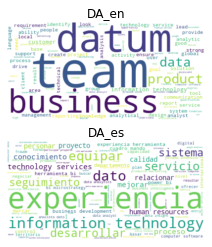

DS_en
DS_es


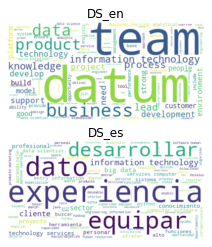

DE_en
DE_es


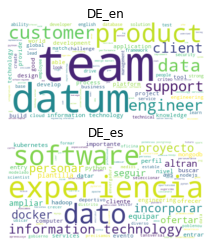

In [81]:
#def cloud_word(unique_jobs):

for j in unique_jobs:
    

    """
    if platform.system() == 'Linux':
        try:
            mask = np.array(Image.open(f"../data/raw/{j}.png"))
        except:
            mask = np.array(Image.open(f"../data/raw/{j}.png"))

    elif platform.system() == 'Windows':
        try:
            mask = np.array(Image.open(f"..\\data\\raw\\{j}.png"))
        except:
            mask = np.array(Image.open(f"..\\data\\raw\\{j}.png"))

    image_colors = ImageColorGenerator(mask)
    """

    job_key_w = job_key_generator(j)
    plot_rows = len(unique_languages)

    fig , axes = plt.subplots(ncols=1, nrows=plot_rows)

    ax = 0
    for lang in unique_languages:
        print(f'{job_key_w}_{lang}')
        plt.axis("off")
        word_corpus = dict_filtered_corpus.get(f'{job_key_w}_{lang}')
        wordcloud = \
        WordCloud(max_font_size=100, max_words=100, background_color="white")\
                .generate(word_corpus)
        #, mask=mask)\
        axes[ax].axis("off")
        axes[ax].set_title(f'{job_key_w}_{lang}')
        axes[ax].imshow(wordcloud, interpolation='bilinear')

        ax+=1
    plt.axis("off")  
    fig.get_figure()
    plt.show()


    if platform.system() == 'Linux':
        fig.savefig(f'../data/results/worldcloud_{job_key_w}_{location}.png', quality =95, dpi=300)
        #wordcloud.to_file(f'../data/results/worldcloud_{job_lang}_{location}.png')

    elif platform.system() == 'Windows':
        fig.savefig(f'..\\data\\results\\worldcloud_{job_key_w}_{location}.png', quality =95, dpi=300)
        #wordcloud.to_file(f'..\\data\\results\\worldcloud_{job_lang}_{location}.png')
        
    

In [150]:
#cloud_word(unique_jobs)

In [ ]:
# Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## Using ML

***
# TESTING

### Counting frequent words

In [ ]:
c = re.findall('\{(.*)\}',str(dict_common_words.get(job_lang)))[0].split(',')
c

In [ ]:
word_freq = Counter(dict_filtered_tokens.get('DA_en'))
type(word_freq)

In [ ]:
common_words = word_freq.most_common
type(common_words)

In [ ]:
common_words

### masks in CLOUD

In [ ]:
if platform.system() == 'Linux':
    mask = np.array(Image.open("../data/raw/plot.png"))
    
elif platform.system() == 'Windows':
    mask = np.array(Image.open("../data/raw/monitor.png"))

    
image_colors = ImageColorGenerator(mask)

In [ ]:
wordcloud = WordCloud(max_font_size=100, max_words=100, mode="RGBA", background_color="white", mask=mask)\
            .generate(dict_filtered_corpus.get(job_lang))

In [ ]:
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()